<a href="https://colab.research.google.com/github/ShrutiAggarwal99/udacity-deep-learning-with-pytorch/blob/master/L6_mnist_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import datasets, transforms

In [0]:
# MNIST data

train_data = datasets.MNIST(root='data',train=True,download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root='data',train=False,download=True, transform=transforms.ToTensor())

trainloader = torch.utils.data.DataLoader(dataset=train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset=test_data, batch_size=64, shuffle=True)

In [0]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

(64, 1, 28, 28)
(64,)


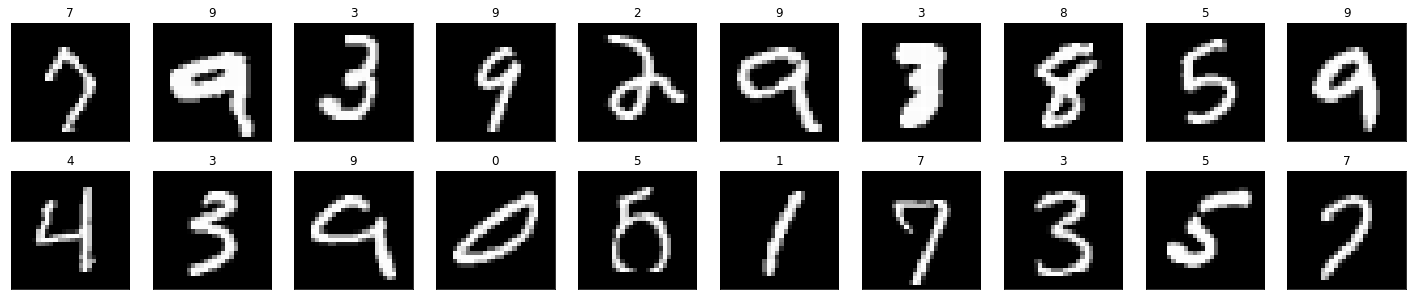

In [7]:
# visulation/analysis of data

images, labels = next(iter(trainloader))

images, labels = images.numpy(), labels.numpy()

fig = plt.figure(figsize=(25,5))

for idx in range(20):
  ax = fig.add_subplot(2,10,idx+1,xticks=[],yticks=[])
  ax.imshow(images[idx].squeeze(), cmap='gray')
  ax.set_title(labels[idx])

print(images.shape)
print(labels.shape)


In [0]:
from torch import nn,optim
import torch.nn.functional as F

In [9]:
# Network Architecture (Decide through research)

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28,512)
    self.fc2 = nn.Linear(512,512)
    self.fc3 = nn.Linear(512,10)
    self.dropout = nn.Dropout(p=0.2)

  def forward(self,x):
    x = x.view(x.shape[0],-1)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = F.log_softmax(self.fc3(x),dim=1)

    return x

# Initialise the NN
classifier = Network()
print(classifier)

Network(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier = classifier.to(device)

print(next(classifier.parameters()).is_cuda)

True


In [0]:
# Loss and Optimizer

criterion = nn.NLLLoss()

optimizer = optim.Adam(classifier.parameters(), lr=0.003)

In [15]:
# Train the NN

epochs = 20

for e in range(epochs):
  train_loss = 0
  classifier.train()

  for images, labels in trainloader:
    images, labels = images.to(device), labels.to(device)

    optimizer.zero_grad()
    log_ps = classifier(images)
    loss = criterion(log_ps,labels)
    train_loss += loss.item()
    loss.backward()
    optimizer.step()

  else:
    with torch.no_grad():
      classifier.eval()
      test_loss = 0
      accuracy = 0

      for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        log_ps = classifier(images)
        test_loss += criterion(log_ps, labels).item()

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(k=1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))

      classifier.train()

  print("Epoch: ", e+1,
        "Training Loss:", train_loss/len(trainloader),
        "Validation Loss:", test_loss/len(testloader),
        "Accuracy:", accuracy/len(testloader))

Epoch:  1 Training Loss: 0.08035206833063985 Validation Loss: 0.09585696272552013 Accuracy: tensor(0.9779)
Epoch:  2 Training Loss: 0.08394184508529712 Validation Loss: 0.11623146645962053 Accuracy: tensor(0.9733)
Epoch:  3 Training Loss: 0.07356818472899036 Validation Loss: 0.10300800774934565 Accuracy: tensor(0.9780)
Epoch:  4 Training Loss: 0.0752626207919279 Validation Loss: 0.11082686485046414 Accuracy: tensor(0.9769)
Epoch:  5 Training Loss: 0.06932952336277932 Validation Loss: 0.12293348080555724 Accuracy: tensor(0.9767)
Epoch:  6 Training Loss: 0.07101160368876162 Validation Loss: 0.1369785208041501 Accuracy: tensor(0.9747)
Epoch:  7 Training Loss: 0.07561769076178211 Validation Loss: 0.09634522085261953 Accuracy: tensor(0.9777)
Epoch:  8 Training Loss: 0.06527451888125922 Validation Loss: 0.11703853266444175 Accuracy: tensor(0.9789)
Epoch:  9 Training Loss: 0.0668873475459434 Validation Loss: 0.11929598047285322 Accuracy: tensor(0.9770)
Epoch:  10 Training Loss: 0.062468046382